# StackOverflow 2023 Survey Data, analysis based on work model

# Business Understanding


* How old are the developers? What are your development stacks? In which country do they work? What is the employment model? What are the main programming languages? 


* How much is remote work related to the developer's age?


* How much is remote work related to the developer stack?


* How much does remote work relate to the country where you work?


* In-person work pays more than remote work? We will see this relationship according to the countries that pay the most according to the work model. 



In [1]:
import pandas as pd
from pathlib import Path
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt



# Data Understanding

Reading the csv files from datalake folder and look the info and columns
###### *csv avaialble in (https://insights.stackoverflow.com/survey)*


In [2]:


df_survey = pd.read_csv('datalake/stack-overflow-developer-survey-2023/survey_results_public.csv')
df_schema = pd.read_csv('datalake/stack-overflow-developer-survey-2023/survey_results_schema.csv')

In [3]:
schema_dict = df_schema[['qname','question']].iloc[4:].to_dict('records')

###### Choose variables to look out.
 The analysis will be carried out on which variables are most related to or have the most data volume in relation to the number of respondents to see how it behaves with the work model. This way, we will choose some columns that are within the dataframe below, which is made up of columns from the dataset that have at least half of the data filled in.
 
 ##### I'm not droping missing values, just choosing columns with less missing values.

In [4]:
df_na = df_survey.isna().mean().reset_index().rename(columns={0:'null_ratio'})
dfnacutoff = df_na[df_na['null_ratio'] <= 0.5]

In [5]:
dfnacutoff.shape[0]/df_survey.shape[1]

0.6547619047619048

In [6]:
dfnacutoff

,index,null_ratio
0,ResponseId,0.000000
1,Q120,0.000000
2,MainBranch,0.000000
3,Age,0.000000
4,Employment,0.014420
5,RemoteWork,0.172385
6,CodingActivities,0.172901
7,EdLevel,0.013579
8,LearnCode,0.017055
9,LearnCodeOnline,0.214164


# Data Preparation
Let's analyze the type of work people do, according to their age,
according to years of experience, according to the country and according to the type of staff they work

In [7]:

dfage_percent = (df_survey.Age.value_counts().sort_values(ascending=False)/df_survey.shape[0]).to_frame()

In [8]:
dfdevtype_percent = (df_survey.DevType.value_counts().sort_values(ascending=False)/df_survey.shape[0]).to_frame()

In [9]:
dfcountry_percent = ((df_survey.Country.value_counts().sort_values(ascending=False)/df_survey.shape[0])).head(30).to_frame()

In [10]:
dfwork_percent = (df_survey.RemoteWork.value_counts().sort_values(ascending=False)/df_survey.shape[0]).to_frame()

In [11]:
dfLanguageHaveWorkedWith = df_survey.LanguageHaveWorkedWith.value_counts().reset_index()

In [12]:
# Creating a list with all distinguish values in programming language column.
all_lang = []
for i in dfLanguageHaveWorkedWith['index']:
    add = i.split(';')
    for language in add:
        if language not in all_lang:
            all_lang.append(language)

In [13]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up 
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx]) 
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('LanguageHaveWorkedWith', ascending=False, inplace=True)
    return new_df

In [14]:
dfLanguages = total_count(dfLanguageHaveWorkedWith, 'index', 'LanguageHaveWorkedWith', all_lang)




# Data Modeling

Let's create the groupby dataframe's 

In [15]:
# dataframe counting number of respondents by type of work and age 
df_char1 = df_survey[['RemoteWork','Age']]
df_char1 =df_survey.groupby(by=['Age','RemoteWork']).count()['ResponseId']
df_char1 = df_char1.reset_index().pivot('Age', 'RemoteWork', 'ResponseId')
df_char1.index = ['18-24', '25-34', '35-44',
       '45-54', '55-64', '65+',
       'No awnser', '-18']

df_char1_perc = df_char1.div(df_char1.sum(axis=1), axis=0)

In [16]:
# dataframe counting number of respondents by type of work and devtype 

df_char2 = df_survey[['RemoteWork','DevType']]
df_char2 =df_survey.groupby(by=['DevType','RemoteWork']).count()['ResponseId']
df_char2 = df_char2.reset_index().pivot('DevType', 'RemoteWork', 'ResponseId')


In [17]:
# Function to see, depending on the type of developer, their type of work
def plot_bystack(df,stacks):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    stacks - a list of strings you want to put in the x-axis to plot
    
    OUTPUT:
    matplotlib plot - line plot with the y-axis being count and x-axis provided by stacks list.
    matplotlib plot - line plot with the y-axis being count proportion and x-axis provided by stacks list.
    '''
    temp = df[df.index.isin(stacks)]
    sns.lineplot(data=temp,markers=True).set_title('Tipe of work viewed by DevType x Count')
    plt.xticks(rotation=5)
    plt.show()
    
    df_perc = df.div(df.sum(axis=1), axis=0)
    temp_perc = df_perc[df_perc.index.isin(stacks)]
    plt.xticks(rotation=5)
    sns.lineplot(data=temp_perc,markers=True).set_title('Percent of type work viewed by DevType')
    plt.show()

In [18]:
# dataframe counting number of respondents by type of work and country 

df_char3 = df_survey[['RemoteWork','Country']]
df_char3 =df_survey.groupby(by=['Country','RemoteWork']).count()['ResponseId']
df_char3 = df_char3.reset_index().pivot('Country', 'RemoteWork', 'ResponseId')

In [19]:
# Function to see your type of work depending on the country
def plot_bycountry(df,countries,rotation=5):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    countries - a list of strings you want to put in the x-axis to plot
    rotation = the angular position of x-axis strings, default = 5.
    
    OUTPUT:
    matplotlib plot - line plot with the y-axis being count and x-axis provided by countries list.
    matplotlib plot - line plot with the y-axis being count proportion and x-axis provided by countries list.
    '''
    temp = df[df.index.isin(countries)]
    sns.lineplot(data=temp,markers=True).set_title('Tipe of work viewed by Country x Count')
    plt.xticks(rotation=rotation)
    plt.show()
    
    df_perc = df.div(df.sum(axis=1), axis=0)
    temp_perc = df_perc[df_perc.index.isin(countries)]
    plt.xticks(rotation=rotation)
    sns.lineplot(data=temp_perc,markers=True).set_title('Percent of Type of work viewed by Country')
    plt.show()

In [20]:

def work_exp_country_type(countries):
    '''
    INPUT:
    countries - a list of strings you want to put in the x-axis to plot
    
    OUTPUT:
    matplotlib plot - line plot with the y-axis being work experience and x-axis the provide countries list.
    '''
    df_char4 = df_survey[['RemoteWork','WorkExp','Country']]
    df_char4 = df_char4[df_char4['Country'].isin(countries)]
    df_char4 =df_char4.groupby(by=['Country','RemoteWork']).mean()['WorkExp']
    df_char4 = df_char4.reset_index().pivot('Country','RemoteWork','WorkExp')
    return df_char4

In [21]:
# dataframe showing average work experience and type of work by country
df_char4_1 = work_exp_country_type(['Brazil','Poland','France','Canada','Germany','United States of America','Australia','India','Netherlands'])


In [22]:
def work_exp_country_type(typework):
    '''
    INPUT:
    typework one in between 'Hybrid (some remote, some in-person)', 'In-person', 'Remote'

    OUTPUT:
    matplotlib plot - line plot with the y-a}xis being average salary and x-axis the top 10 countries for that type of work based on salary.
        '''
    df_char5 = df_survey[['RemoteWork','ConvertedCompYearly','Country']]
    df_char5 = df_char5[df_char5['Country']!='Mali']
    df_char5 =df_char5.groupby(by=['Country','RemoteWork']).mean()['ConvertedCompYearly']
    df_char5 = df_char5.reset_index().pivot('Country','RemoteWork','ConvertedCompYearly')
    df_char5 = df_char5[[typework]]
    df_char5 = df_char5.sort_values(by=typework,ascending=False).head(10)
    df_char5 = df_char5.round(0)
    return df_char5

In [23]:
df_char5=work_exp_country_type('Hybrid (some remote, some in-person)')

In [24]:
df_char5_1 = work_exp_country_type('Hybrid (some remote, some in-person)')
df_char5_2 = work_exp_country_type('In-person')
df_char5_3 = work_exp_country_type('Remote')



# Evaluating the results

## `1.` How old are the developers? What are your development stacks? In which country do they work? What is the employment model? What are the main programming languages?

In [25]:
dfage_percent


,Age
25-34 years old,0.372791
35-44 years old,0.230221
18-24 years old,0.201056
45-54 years old,0.093447
Under 18 years old,0.046286
55-64 years old,0.038034
65 years or older,0.013130
Prefer not to say,0.005035


In [26]:
dfdevtype_percent.head()


,DevType
"Developer, full-stack",0.288561
"Developer, back-end",0.154120
"Developer, front-end",0.056860
"Developer, desktop or enterprise applications",0.043775
Other (please specify):,0.034535


In [27]:
dfcountry_percent.head(10)

,Country
United States of America,0.209085
Germany,0.082167
India,0.063072
United Kingdom of Great Britain and Northern Ireland,0.062253
Canada,0.039323
France,0.032887
Poland,0.027303
Netherlands,0.026720
Australia,0.023300
Brazil,0.022896


In [28]:
dfwork_percent

,RemoteWork
"Hybrid (some remote, some in-person)",0.349065
Remote,0.342730
In-person,0.135820


In [29]:
dfLanguages.head(10)

,index,LanguageHaveWorkedWith
14,C,65678
7,Java,63638
1,JavaScript,55711
0,HTML/CSS,46396
3,Python,43158
5,SQL,42623
2,TypeScript,34041
9,Bash/Shell (all shells),28351
6,C#,24193
11,C++,19634


Here are some interesting facts about the interviewees, our most common developer is a fullstack developer from the US who programs in c and is between 25 and 34 years old. Maybe he work remotely or maybe he work hybrid.

## `2.` How much is remote work related to the developer's age?


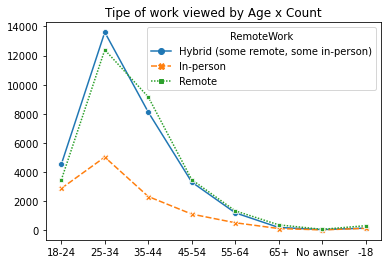

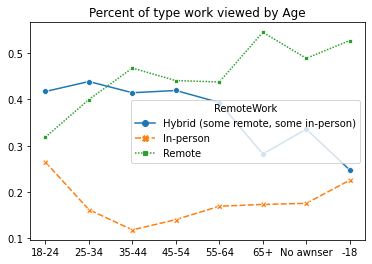

In [30]:
sns.lineplot(data=df_char1,markers=True).set_title('Tipe of work viewed by Age x Count')
plt.show()
sns.lineplot(data=df_char1_perc,markers=True).set_title('Percent of type work viewed by Age')
plt.show()

We can see that the majority of people who responded to the survey are between 25-34 years old, and that they mostly work
in a hybrid model.
However, we can see that the group where there are more people working remotely would be the group of people over 65 years old.
And at all ages, **people work less in a fully in-person job.**

## `3.` How much is remote work related to the developer stack?


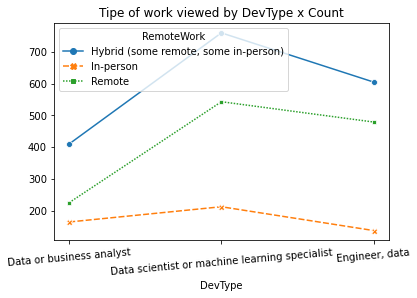

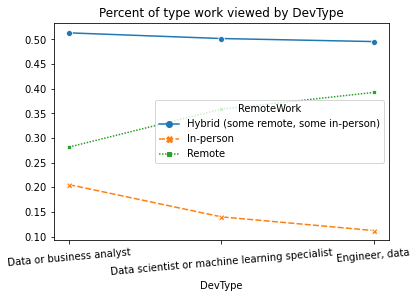

In [31]:
plot_bystack(df_char2,['Data or business analyst','Engineer, data','Data scientist or machine learning specialist'])


We can see that for professions in the data field, all stacks have hybrid work being the most performed. And just like in the analysis by age, in-person work is the least performed.



`4.`How much does remote work relate to the country where you work?

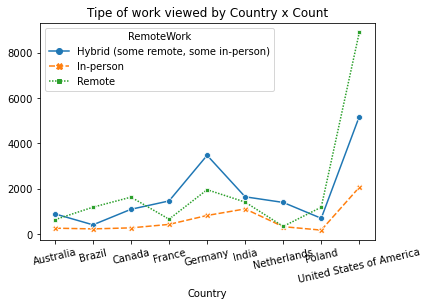

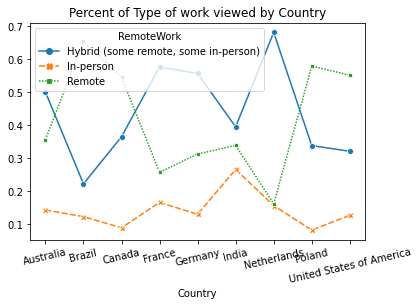

In [32]:
plot_bycountry(df_char3,['Brazil','Poland','France','Canada','Germany','United States of America','Australia','India','Netherlands'],13)


The top 10 countries were analyzed in relation to the number of responses. We can note that the majority of respondents are from the United States and that in-person work is also the least performed among all. Interesting facts such as Brazil has the highest percentage of remote work practitioners says a lot about company cultures. Unlike Germany being the second largest respondent with the hybrid being the most executed.

`5.` In-person work pays more than remote work? We will see this relationship according to the countries that pay the most according to the work model. 


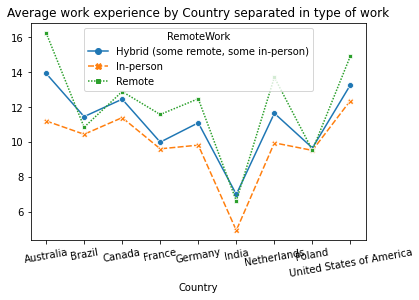

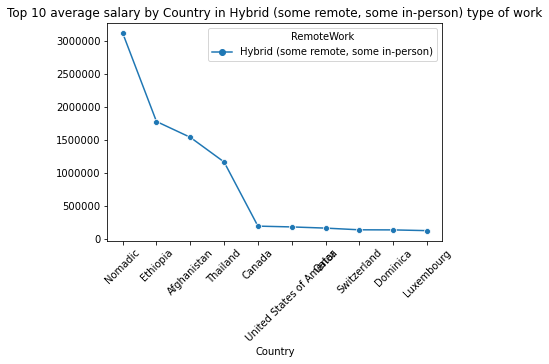

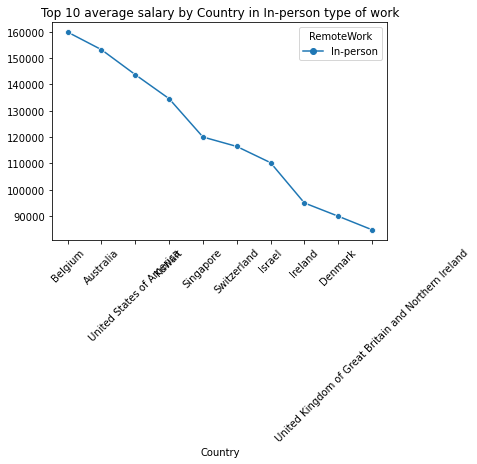

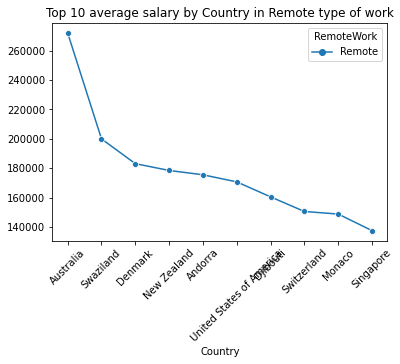

In [33]:
sns.lineplot(data=df_char4_1,markers=True,estimator='median').set_title('Average work experience by Country separated in type of work')
plt.xticks(rotation=10)
plt.show()

sns.lineplot(data=df_char5_1,markers=True,estimator='median').set_title(f'Top 10 average salary by Country in Hybrid (some remote, some in-person) type of work')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

sns.lineplot(data=df_char5_2,markers=True,estimator='median').set_title(f'Top 10 average salary by Country in In-person type of work')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

sns.lineplot(data=df_char5_3,markers=True,estimator='median').set_title(f'Top 10 average salary by Country in Remote type of work')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


##### We can see that the lowest average payer would be for in-person model work. And we can also note four outlier countries in the hybrid model.
##### But this shows that the best talents reported directly to the people with the highest salaries may have the option to choose their salary style, due to their high demand for companies, and these talents tend to choose days worked from home.